# LOAD LIBRARIES

In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

# LOAD DATASETS

In [41]:
X_train = np.loadtxt('Pinput.csv', delimiter =  ',')
Y_train = np.loadtxt('Plabels.csv', delimiter =  ',')

X_test = np.loadtxt('Pinput_test.csv', delimiter =  ',')
Y_test = np.loadtxt('Plabels_test.csv', delimiter =  ',')


In [42]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [43]:
X_train =  X_train.reshape(len(X_train), 100, 100, 3)
Y_train =  Y_train.reshape(len(Y_train), 1)

X_test  =  X_test.reshape(len(X_test), 100, 100, 3)
Y_test =  Y_test.reshape(len(Y_test), 1)

X_train = X_train/255
X_test  = X_test/255


In [44]:
print(X_train.shape)
print(X_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)


In [45]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

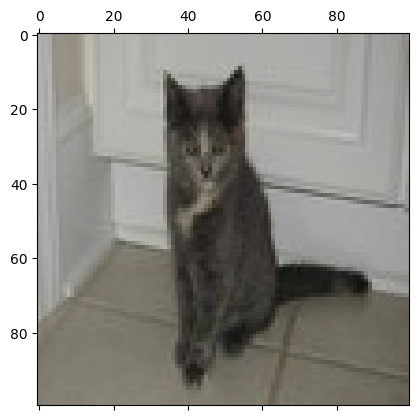

In [46]:
index = random.randint(0, len(X_train))
plt.matshow(X_train[index, :])
plt.show()

# MODEL

In [47]:
model =  Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

# Another way of adding layer to model

In [20]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# FITTING OF MODEL

In [49]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 10s 228ms/step - loss: 0.7403 - accuracy: 0.5140
Epoch 2/5
32/32 [==============================] - 7s 222ms/step - loss: 0.6712 - accuracy: 0.6070
Epoch 3/5
32/32 [==============================] - 7s 222ms/step - loss: 0.6416 - accuracy: 0.6325
Epoch 4/5
32/32 [==============================] - 7s 221ms/step - loss: 0.5807 - accuracy: 0.6965
Epoch 5/5
32/32 [==============================] - 7s 227ms/step - loss: 0.5369 - accuracy: 0.7345


In [50]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 34ms/step - loss: 0.6420 - accuracy: 0.6625


[0.642037570476532, 0.6625000238418579]

# MAKING PREDICTIONS

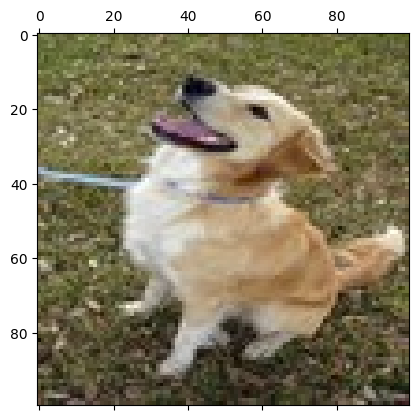

1/1 [==============================] - 0s 40ms/step
Our model says it is : dog


In [61]:
index2 = random.randint(0, len(X_test))
plt.matshow(X_test[index2, :])
plt.show()

y_pred = model.predict(X_test[index2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
    
else:
    pred = 'cat'
    
    
print("Our model says it is :", pred)    
    